<a href="https://colab.research.google.com/github/gaultierB/iaSpotifyClassificationMusic/blob/main/Cluster_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
!pip install spotipy streamlit pandas

     |████████████████████████████████| 9.9 MB 6.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 138 kB 41.5 MB/s 
     |████████████████████████████████| 181 kB 48.3 MB/s 
     |████████████████████████████████| 111 kB 40.9 MB/s 
     |████████████████████████████████| 4.3 MB 26.4 MB/s 
     |████████████████████████████████| 164 kB 62.4 MB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 130 kB 41.4 MB/s 
     |████████████████████████████████| 793 kB 10.6 MB/s 
     |████████████████████████████████| 380 kB 22.4 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=d9bf8441a870bbb652928ef97e1e1d0bf35d6f121121520110c2459b8c6f9be1
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: pro

In [ ]:
import io
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import streamlit as st
import pandas as pd


""" from spotipy.oauth2 import SpotifyOAuth """

# TOINOU CRED
SPOTIPY_USERNAME = '11160586145'
SPOTIPY_CLIENT_ID = 'a7c7d2ff9ff94588bb2813c890002832'
SPOTIPY_CLIENT_SECRET = '5fb776eede304be38a6686fca3e034d0'
SPOTIPY_REDIRECT_URI = 'www.localhost:3000/code?='

# GOGO CRED
SPOTIPY_USERNAME_BIS = '21k7i3ydatwaab2z745ne76vq'
SPOTIPY_CLIENT_ID_BIS = 'e6e434c447964a03b6284e99dee6e100'
SPOTIPY_CLIENT_SECRET_BIS = '0e4669b3dd254b679b95461d93a984ff'
SPOTIPY_REDIRECT_URI = 'www.localhost:3000/code?='
playlist_uri = "spotify:playlist:6RSidMkiGyzsoeDH16RNNi"

columns = ['name', 'artist', 'track_URI', 'playlist', 'acousticness', 'danceability',
           'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

def get_playlist_info(username, playlist_uri):
    # initialize vars
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                               client_secret=SPOTIPY_CLIENT_SECRET))

    # initialize vars
    offset = 0
    tracks, uris, names, artists = [], [], [], []

    # get playlist id and name from URI
    playlist_id = playlist_uri.split(':')[2]
    playlist_name = sp.user_playlist(username, playlist_id)['name']

    # get all tracks in given playlist (max limit is 100 at a time --> use offset)
    while True:
        results = sp.user_playlist_tracks(username, playlist_id, offset=offset)
        tracks += results['items']
        if results['next'] is not None:
            offset += 100
        else:
            break

    # get track metadata
    for track in tracks:
        names.append(track['track']['name'])
        artists.append(track['track']['artists'][0]['name'])
        uris.append(track['track']['uri'])

    return playlist_name, names, artists, uris


def get_features_for_playlist(username, uri):

    # get all track metadata from given playlist
    playlist_name, names, artists, uris = get_playlist_info(username, uri)
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                               client_secret=SPOTIPY_CLIENT_SECRET))

    global columns
    temp_df = pd.DataFrame(columns=columns)

    # get all track metadata from given playlist
    playlist_name, names, artists, uris = get_playlist_info(username, uri)

    # iterate through each track to get audio features and save data into dataframe
    for name, artist, track_uri in zip(names, artists, uris):

        # access audio features for given track URI via spotipy
        audio_features = sp.audio_features(track_uri)

        # get relevant audio features
        feature_subset = [audio_features[0][col] for col in temp_df.columns if col not in [
            "name", "artist", "track_URI", "playlist"]]

        # compose a row of the dataframe by flattening the list of audio features
        row = [name, artist, track_uri, playlist_name, *feature_subset]
        temp_df.loc[len(temp_df.index)] = row
    return temp_df


def concatenate_playlists(playlists):
    global columns
    print("concatenate playlists")
    df = pd.DataFrame(columns=columns)
    if all(playlists):
        for playlist_uri in playlists:
            df = pd.concat([df, get_features_for_playlist(
                SPOTIPY_USERNAME_BIS, playlist_uri)], ignore_index=True, axis=0)
        return df
    else:
        return None


def playlist_user_input(num_playlists):
    playlists = []
    defaults = ["spotify:playlist:2FjYGGG8DWKURqDRqoWKp4", "spotify:playlist:37i9dQZF1DX69CtfiQ1kOa",
                "spotify:playlist:37i9dQZF1DXbSbnqxMTGx9",
                "spotify:playlist:37i9dQZF1DWU4xkXueiKGW",
                ]
    st.sidebar.write(
        "To locate a playlist URI, go to the playlist on Spotify, click the '...' button at the top, then go to Share > Copy Spotify URI. Some examples are pre-filled :)")
    for i in range(num_playlists):
        playlists.append(st.sidebar.text_input(
            "Playlist URI " + str(i+1), defaults[i]))
    return playlists


playlists = playlist_user_input(4)
df = concatenate_playlists(playlists)
print(df)

2022-03-23 11:49:00.218 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
2022-03-23 11:49:01.987 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


concatenate playlists
                        name          artist  \
0                FOOL'S GOLD           Aries   
1            Hills Have Eyes       POORSTACY   
2               Sex n' Drugs  Abhi The Nomad   
3                 Part of Me           Healy   
4                    Perfect      Yung Pinch   
..                       ...             ...   
205                       TR         Gambino   
206                  Sincère            Kaza   
207                   Fauves         Zamdane   
208  Sadness, Pt. 2 : Voleur             GLK   
209             Terrain miné            Lefa   

                                track_URI   playlist  acousticness  \
0    spotify:track:1ryUAnJ3gPNtw85hwiVA7Z     Mood☹️      0.281000   
1    spotify:track:3HUB8GPbaGpIpjRoONLJP4     Mood☹️      0.000103   
2    spotify:track:0G2wimhVoDYXbQ6csDxtSf     Mood☹️      0.299000   
3    spotify:track:2yRlcQn3yUqseUYHw2XzNZ     Mood☹️      0.441000   
4    spotify:track:1JmEymqQwLXvCg3sJ7gz0n     Mood☹

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
columns_get = ['acousticness', 'danceability',
           'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
# Separating out the features
x = df.loc[:, columns_get].values
# Separating out the target
y = df.loc[:,['playlist']].values
print(y)
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['playlist']]], axis = 1)
all_different_name_playlist = []
for name_playlist in finalDf['playlist']:
  if name_playlist not in all_different_name_playlist:
    all_different_name_playlist.append(name_playlist)
print(all_different_name_playlist)

[['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Mood☹️']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 ['Top Hits Rock']
 

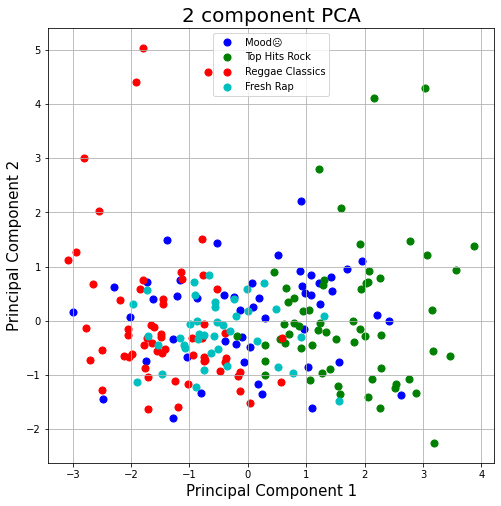

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['b', 'g', 'r', 'c']
for genre, color in zip(all_different_name_playlist,colors):
    indicesToKeep = finalDf['playlist'] == genre
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(all_different_name_playlist)
ax.grid()

     principal component 1  principal component 2
0                -0.143358               0.193634
1                 1.950872               1.098035
2                -1.753563              -0.736470
3                -2.293549               0.631976
4                 0.062232               0.690439
..                     ...                    ...
205               0.160805              -0.380903
206              -0.020602               0.592092
207              -0.875263               0.004331
208              -0.897889               0.484935
209               0.524242              -0.850325

[210 rows x 2 columns]


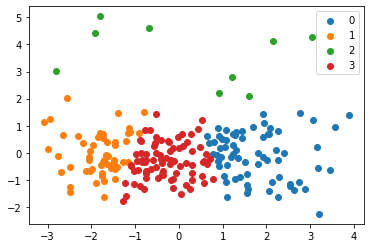

Score Silouhette =  0.3342664087522771


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)
#label = kmeans.fit_predict(principalDf)
#principalDf['cluster'] = label
print(principalDf)
from sklearn.metrics import silhouette_score
cluster_labels = kmeans.fit_predict(principalDf)
u_labels = np.unique(cluster_labels)
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalDf.iloc[cluster_labels == i , 0] , principalDf.iloc[cluster_labels == i , 1] , label = i)
plt.legend()
plt.show()

silouhette = silhouette_score(principalDf, cluster_labels)

print("Score Silouhette = ",silouhette)

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,11) 
  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

NameError: ignored

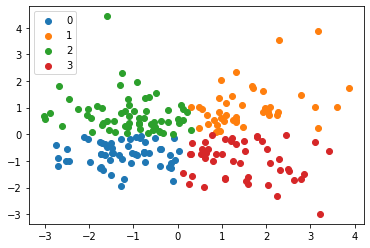

In [ ]:
#Importing required modules
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(principalDf)

import matplotlib.pyplot as plt
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalDf.iloc[label == i , 0] , principalDf.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
import spotipy.util as util
from spotipy import oauth2
SCOPE = 'user-library-read'
CACHE = '.spotipyoauthcache'

dfCluster = pd.concat([df, pd.DataFrame(label ,columns=["cluster"])], axis = 1)
a = dfCluster[dfCluster['cluster'] == 0]['track_URI'].array
b = dfCluster[dfCluster['cluster'] == 1]['track_URI'].array
c = dfCluster[dfCluster['cluster'] == 2]['track_URI'].array
d = dfCluster[dfCluster['cluster'] == 3]['track_URI'].array

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID_BIS,client_secret=SPOTIPY_CLIENT_SECRET_BIS))

sp.user_playlist_add_tracks(SPOTIPY_USERNAME_BIS, playlist_id="spotify:playlist:3rwTNNxfIDaIBbAdx1Aela", tracks=a)
sp.user_playlist_add_tracks(SPOTIPY_USERNAME_BIS, playlist_id="spotify:playlist:4QzJ6x1hY8dHsnxuasV8oc", tracks=b)
sp.user_playlist_add_tracks(SPOTIPY_USERNAME_BIS, playlist_id="spotify:playlist:4RlCuSvTT0SvvuBKFQhIhv", tracks=c)
sp.user_playlist_add_tracks(SPOTIPY_USERNAME_BIS, playlist_id="spotify:playlist:6s37hcTd9NFSegAAlZIBYi", tracks=d)


2022-03-17 15:16:48.670 HTTP Error for POST to https://api.spotify.com/v1/playlists/3rwTNNxfIDaIBbAdx1Aela/tracks with Params: {'position': None} returned 403 due to This request requires user authentication.


SpotifyException: ignored

['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'playlist']


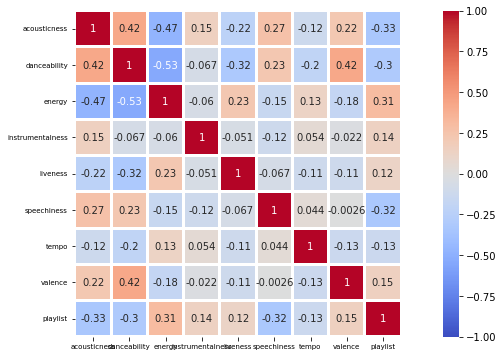

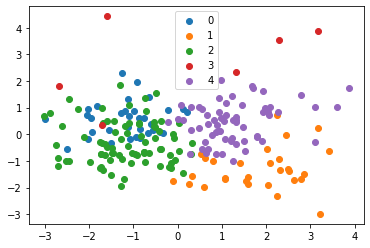

In [ ]:
# test without pca 
from sklearn.preprocessing import StandardScaler
columns_get = ['acousticness', 'danceability',
           'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
# Separating out the features
x = df.loc[:, columns_get].values
# Separating out the target
y = df.loc[:,['playlist']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

#Importing required modules
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(x)

import matplotlib.pyplot as plt
 
u_labels = np.unique(label)

# for i in u_labels:
#     plt.scatter(x.iloc[label == i , 0] , x.iloc[label == i , 1] , label = i)
# plt.legend()
# plt.show()
df_without_pca = pd.DataFrame(x)
df_without_pca['playlist'] = df['playlist']
df_without_pca['playlist'] = df_without_pca['playlist'].replace(['Mood☹️','Fresh Rap', 'Reggae Classics', 'Top Hits Rock'],[0,1,2,3])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
columns_get.append('playlist')
g = sns.heatmap(df_without_pca.corr(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            linewidths=2,
            square=True);
print(columns_get)
g.set_xticklabels(columns_get, rotation = 0, fontsize = 7)
g.set_yticklabels(columns_get, rotation = 0, fontsize = 7)
plt.show()

for i in u_labels:
    plt.scatter(principalDf.iloc[label == i , 0] , principalDf.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

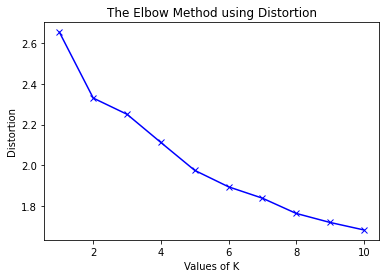

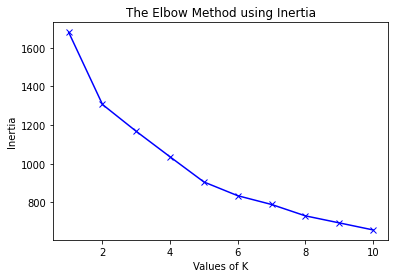

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,11) 
  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k).fit(x) 
    kmeanModel.fit(x)     
      
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

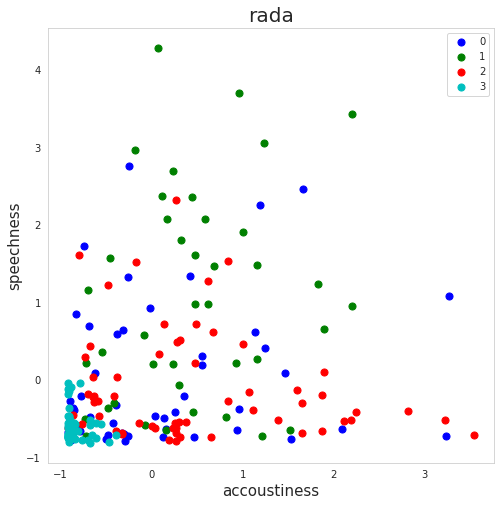

In [ ]:
playlist = [0, 1 , 2, 3, 4]
colors = ['b', 'g', 'r', 'c']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('accoustiness', fontsize = 15)
ax.set_ylabel('speechness', fontsize = 15)
ax.set_title('rada', fontsize = 20)
for p, color in zip(playlist,colors):
    indicesToKeep = df_without_pca['playlist'] == p
    ax.scatter(df_without_pca.loc[indicesToKeep, 0]
               , df_without_pca.loc[indicesToKeep, 5]
               , c = color
               , s = 50)
ax.legend(playlist)
ax.grid()
fig.show()

In [ ]:
username = '21k7i3ydatwaab2z745ne76vq'
client_id = 'e6e434c447964a03b6284e99dee6e100'
client_secret = '0e4669b3dd254b679b95461d93a984ff'
SPOTIPY_REDIRECT_URI = 'www.localhost:3000/code?='
playlist_uri = "spotify:playlist:6RSidMkiGyzsoeDH16RNNi"

columns = ['name', 'artist', 'track_URI', 'playlist', 'acousticness', 'danceability',
           'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

import io
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import streamlit as st
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


def get_playlist_info(username, playlist_uri):
    # initialize vars
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                               client_secret=client_secret))

    # initialize vars
    offset = 0
    tracks, uris, names, artists = [], [], [], []

    # get playlist id and name from URI
    playlist_id = playlist_uri.split(':')[2]
    playlist_name = sp.user_playlist(username, playlist_id)['name']

    # get all tracks in given playlist (max limit is 100 at a time --> use offset)
    while True:
        results = sp.user_playlist_tracks(username, playlist_id, offset=offset)
        tracks += results['items']
        if results['next'] is not None:
            offset += 100
        else:
            break

    # get track metadata
    for track in tracks:
        names.append(track['track']['name'])
        artists.append(track['track']['artists'][0]['name'])
        uris.append(track['track']['uri'])

    return playlist_name, names, artists, uris

def pca(df):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    return principalDf

# def show_pca(df_pca):
#     fig = plt.figure(figsize=(8, 8))
#     ax = fig.add_subplot(1, 1, 1)
#     ax.set_xlabel('Principal Component 1', fontsize=15)
#     ax.set_ylabel('Principal Component 2', fontsize=15)
#     ax.set_title('2 component PCA', fontsize=20)
#     colors = ['b', 'g', 'r', 'c']
#     for genre, color in zip(all_different_name_playlist, colors):
#         indicesToKeep = finalDf['playlist'] == genre
#         ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                    , finalDf.loc[indicesToKeep, 'principal component 2']
#                    , c=color
#                    , s=50)
#     ax.legend(all_different_name_playlist)
#     ax.grid()

def search_k(principalDf):
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, 11)

    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(x)
        kmeanModel.fit(x)

        distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / x.shape[0])
        inertias.append(kmeanModel.inertia_)

        mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / x.shape[0]
        mapping2[k] = kmeanModel.inertia_

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

def k_means(principalDf):
    kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)
    # label = kmeans.fit_predict(principalDf)
    # principalDf['cluster'] = label
    print(principalDf)
    from sklearn.metrics import silhouette_score
    cluster_labels = kmeans.fit_predict(principalDf)
    u_labels = np.unique(cluster_labels)
    # plotting the results:

    for i in u_labels:
        plt.scatter(principalDf.iloc[cluster_labels == i, 0], principalDf.iloc[cluster_labels == i, 1], label=i)
    plt.legend()
    plt.show()


playlist_name, names, artists, uris = get_playlist_info(username, playlist_uri)
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
data_song = []
for uri in uris:
    data_song.append(sp.audio_features(uri)[0])
print("DATA FRAME FINIS")
df = pd.DataFrame(data_song)
columns_get = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
x = df.loc[:, columns_get].values
y = df.loc[:,['track_URI']].values
X = StandardScaler().fit_transform(x)
df_pca = pca(X)
print("PCA FINIS")
search_k(df_pca)

2022-03-18 23:16:50.220 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


DATA FRAME FINIS


KeyError: ignored